# 1. Les packages

In [1]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_style("whitegrid")
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

In [2]:
# Importer les données
data_netflix = pd.read_csv(r"C:\Users\diarr\Projets_Personnels\Films_et_emissions_de_ television_Netflix\netflix_titles.csv")

* Après chargement puis importation des données, nous allons essayer de les parcourir pour en tirer le maximum d'information.

## 2.1 Exploration des données

In [3]:
# Afficher les 5 premières lignes de données
data_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Forme du jeu de données
data_netflix.shape

(8807, 12)

* Nous avons plus de 8000 films ou émissions de télévision c'est à dire chaque ligne représente soit un film, soit une émission de télévision avec des caractérisques (12 colonnes qui représentent chacune les détails d'un film ou émission de télévision).

## À propos de cet ensemble de données : 

* Netflix est l'une des plateformes de streaming multimédia et vidéo les plus populaires. 
* Ils ont plus de 8 000 films ou émissions de télévision disponibles sur leur plate-forme et, à la mi-2021, ils comptaient plus de 200 millions d'abonnés dans le monde. 
* Cet ensemble de données tabulaires comprend des listes de tous les films et émissions de télévision disponibles sur Netflix, ainsi que des détails tels que la distribution, les réalisateurs, les notes, l'année de sortie, la durée, etc.
* Avec une fréquence de mise à jour prévue tous les 3 mois (trimestriel).

In [5]:
# Vérification de valeurs manquantes
data_netflix.isnull().any().any()

True

In [6]:
# Vérification de valeurs manquantes
data_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Vérification de valeurs manquantes
data_netflix.isnull().sum().sum()

4307

In [8]:
# Pourcentages des valeurs nulls
percent_null_value = round((data_netflix.isnull().sum()/data_netflix.shape[0]*100),2).sort_values(ascending = False)
percent_null_value

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [9]:
# Vérification des doublons
data_netflix[data_netflix.duplicated()].shape

(0, 12)

In [10]:
# Vérification des doublons à partir de l'identifiant
data_netflix[data_netflix.duplicated(["show_id"])].shape

(0, 12)

In [11]:
# Typages de données
info_data = data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# Statistiques descriptives avec toutes les variables
statistique = data_netflix.describe(include = "all").T
statistique

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# pour trouver les éléments unique de la colonne
data_netflix["country"].nunique()

748

* Après une courte exploration de nos données, nous avons retenus:
    * L'absence de doublons;
    * La présence de valeurs manquantes (dans certaines colonnes)
    * Les différents formats de nos données (object et int)

In [14]:
data_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2.2 Analyse des données

* Nous faire une courte analyse des données pour en savoir plus sur nos données.

Commençons dabord à remplacer nos valeurs manquantes (avec le mode() car nous avons des variables catégorielles) puis mettre la colonne au bon format (date).

In [15]:
# Remplaçons les valeurs manquantes 
#data_netflix["director"] = data_netflix["director"].fillna("Unknow")
#data_netflix["country"] = data_netflix["country"].fillna("Unknow")
#data_netflix["cast"] = data_netflix["cast"].fillna("Unknow")
#data_netflix["rating"] = data_netflix["rating"].fillna("Unknow")         

In [16]:
# Vérifions les valeurs les plus fréquentes dans ces colonne
print("Dans la colonne Director c'est : ", data_netflix["director"].mode()[0])
print("--------------------------------------------------------")
print("Dans la colonne country c'est : ", data_netflix["country"].mode()[0])
print("--------------------------------------------------------")
print("Dans la colonne cast c'est : ", data_netflix["cast"].mode()[0])
print("--------------------------------------------------------")
print("Dans la colonne rating c'est : ", data_netflix["rating"].mode()[0])
print("--------------------------------------------------------")
print("Dans la colonne date_added c'est : ", data_netflix["date_added"].mode()[0])
print("--------------------------------------------------------")
print("Dans la colonne duration c'est : ", data_netflix["duration"].mode()[0])
print("--------------------------------------------------------")

Dans la colonne Director c'est :  Rajiv Chilaka
--------------------------------------------------------
Dans la colonne country c'est :  United States
--------------------------------------------------------
Dans la colonne cast c'est :  David Attenborough
--------------------------------------------------------
Dans la colonne rating c'est :  TV-MA
--------------------------------------------------------
Dans la colonne date_added c'est :  January 1, 2020
--------------------------------------------------------
Dans la colonne duration c'est :  1 Season
--------------------------------------------------------


In [17]:
# Remplaçons les valeurs manquantes 
# mode()[0] sélectionne simplement la première valeur de cette série, c’est-à-dire la valeur la plus courante.
data_netflix["director"] = data_netflix["director"].fillna(data_netflix["director"].mode()[0])
data_netflix["country"] = data_netflix["country"].fillna(data_netflix["country"].mode()[0])
data_netflix["cast"] = data_netflix["cast"].fillna(data_netflix["cast"].mode()[0])
data_netflix["rating"] = data_netflix["rating"].fillna(data_netflix["rating"].mode()[0])
data_netflix["date_added"] = data_netflix["date_added"].fillna(data_netflix["date_added"].mode()[0])
data_netflix["duration"] = data_netflix["duration"].fillna(data_netflix["duration"].mode()[0])

In [18]:
# Vérifions ques les valeurs manquantes sont tous remplacées
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
# Remplacer les virgules par espace
data_netflix["date_added"] = data_netflix["date_added"].str.replace(",","")
# Mettre la colonne au bon format date
data_netflix["date_added"] = pd.to_datetime(data_netflix["date_added"])
# Vérifions le format de la colonne
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [20]:
# Afficher à nouveau les données
data_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


* Après avoir converti au bon format , nous allons créer de nouvelles colonnes à partir de la colonne "date_added" pour en extraire l'année, le mois et jour d'ajout.

In [21]:
# Création de nouvelles colonnes
# Colonne année
data_netflix["year_added"] = data_netflix["date_added"].dt.year

# Colonne mois
#data_netflix["month_added"] = data_netflix["date_added"].dt.month
data_netflix["month_added"] = data_netflix["date_added"].dt.month_name()

# Colonne jour du mois
data_netflix["day_added"] = data_netflix["date_added"].dt.day

In [22]:
# toutes les valeurs uniques présentes dans la colonne "listed_in"
#data_netflix["listed_in"].unique()
# le nombre de valeurs uniques présentes dans la colonne "listed_in"
data_netflix["listed_in"].nunique()

514

In [23]:
# Extraction des premières valeurs de la colonne listed_in en tant que genre
#data_netflix["genre"] = data_netflix["listed_in"].str.split(",").explode().str.strip().value_counts()
data_netflix["genre"] = data_netflix["listed_in"].str.split(",").str[0]

In [24]:
# Afficher le résultat
data_netflix["genre"]

0                  Documentaries
1         International TV Shows
2                 Crime TV Shows
3                     Docuseries
4         International TV Shows
                  ...           
8802                 Cult Movies
8803                    Kids' TV
8804                    Comedies
8805    Children & Family Movies
8806                      Dramas
Name: genre, Length: 8807, dtype: object

In [25]:
# Compter combien de fois chaque genre apparaît dans la colonne
data_netflix["genre"].value_counts().head(5)

Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: genre, dtype: int64

In [26]:
# Afficher toutes les valeurs uniques présentes dans la colonne "cast"
data_netflix["cast"].unique()

array(['David Attenborough',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [27]:
# Extraction des premières valeurs de la colonne cast en tant que acteur principal
data_netflix["lead_actor"] = data_netflix["cast"].str.split(",").str[0]

# Compter combien de fois chaque acteur principal apparaît dans la colonne
data_netflix["lead_actor"].value_counts().head(5)

David Attenborough    845
Shah Rukh Khan         26
Akshay Kumar           23
Amitabh Bachchan       20
Adam Sandler           20
Name: lead_actor, dtype: int64

In [28]:
# Afficher toutes les valeurs uniques présentes dans la colonne "rating"
data_netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [29]:
# vérifie si chaque valeur de la colonne "rating" contient la sous-chaîne "min".
# si oui de prendre le contraire avec la fonction (~)
data_netflix = data_netflix[~data_netflix["rating"].str.contains("min")]

# Afficher toutes les valeurs uniques présentes dans la colonne "rating" aprés correction
data_netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [30]:
# Compter combien de fois chaque rating apparaît dans la colonne
data_netflix["rating"].value_counts().head(5)

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

## 2.3 Suppression des variables

* Après une courte analyse des données puis la création de nouvelles variable, nous allons supprimer certaines de ces variables qui nous semblent pas nous apporter beaucoup d'informations car c'est à partir de ces variables sources qu'on a pu créer de nouvelles variables pour en ajouter le plus d'informations.

In [31]:
# Suppression des variables
data_netflix = data_netflix.drop(columns = [ "cast", "date_added", "listed_in"])

In [32]:
# Affichage des données finales
data_netflix.head(3)

,show_id,type,title,director,country,release_year,rating,duration,description,year_added,month_added,day_added,genre,lead_actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,Documentaries,David Attenborough
1,s2,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,International TV Shows,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,September,24,Crime TV Shows,Sami Bouajila


## Idées de tâches intéressantes
* Comprendre quel contenu est disponible dans différents pays
* Identifier un contenu similaire en faisant correspondre les fonctionnalités basées sur le texte
* Analyse du réseau d'acteurs/réalisateurs et recherche d'informations intéressantes
* Netflix s'est-il davantage concentré sur les émissions de télévision que sur les films ces dernières années ?

# 4. Visualisations des données

* Dans cette dernière partie nous allons faire la visualisation de nos données pour mieux comprendre Netflix qui est l'une des plateformes de streaming multimédia et vidéo les plus populaires.

## 4.1 Répartition des films et émissions télévisées sur Netfix

In [33]:
# Compter combien de fois chaque films ou emission apparaît dans la colonne
data_netflix["type"].value_counts().head(5)

Movie      6128
TV Show    2676
Name: type, dtype: int64

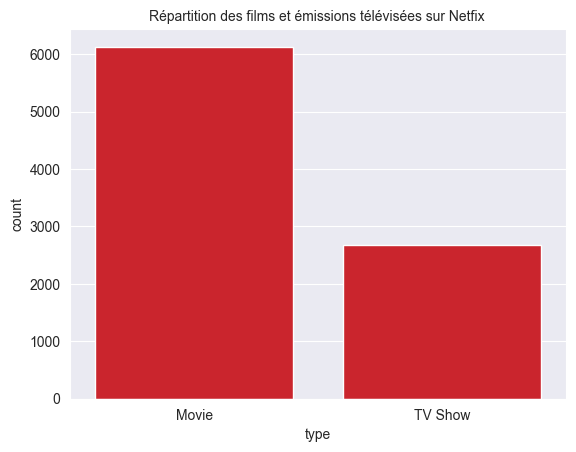

In [34]:
# visualisation du type
sns.countplot(x = data_netflix["type"], order = data_netflix["type"].value_counts(ascending=False).index , color = "#E50914")
plt.title("Répartition des films et émissions télévisées sur Netfix ", fontsize = 10)
plt.show()

## 4.2 La répartition du genre de contenu les plus présent sur Netflix

In [35]:
# Compter combien de fois chaque genre apparaît dans la colonne
Count_genre = data_netflix["genre"].value_counts()
Count_genre.head(10)

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     388
Stand-Up Comedy              334
Horror Movies                275
Name: genre, dtype: int64

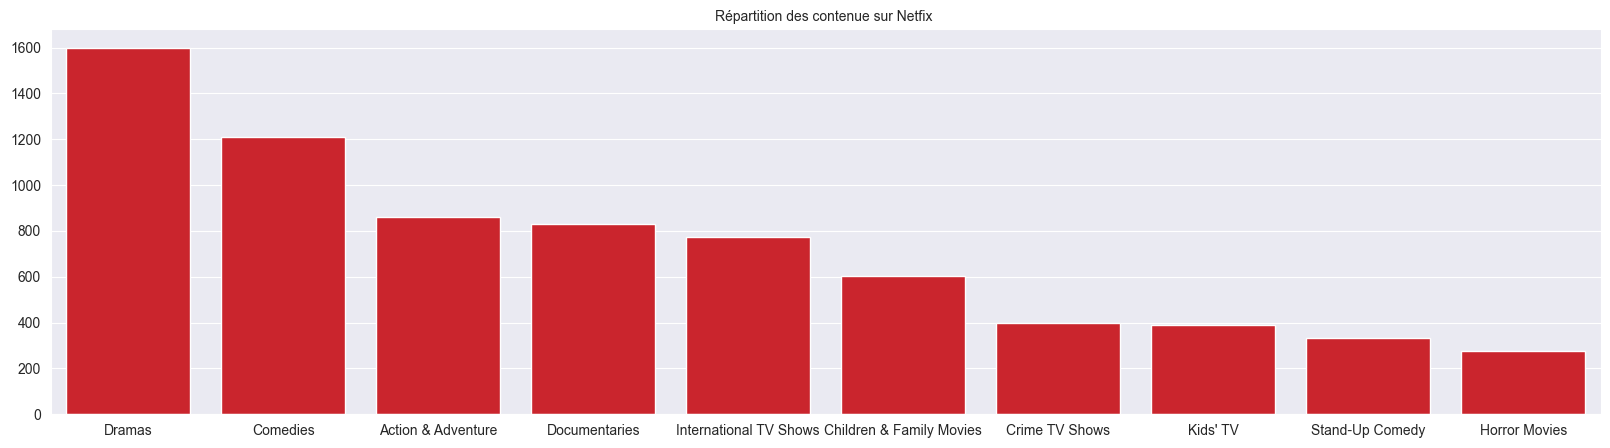

In [36]:
# visualisation du genre
plt.figure(figsize=(20,5))
sns.barplot(x = Count_genre.head(10).index , y = Count_genre.head(10).values, color = "#E50914")
plt.title("Répartition des contenue sur Netfix ", fontsize = 10)
plt.show()

## 4.3 La répartition sur la classifications des contenus sur Netflix

In [37]:
# Compter combien de fois chaque genre apparaît dans la colonne
Count_rating = data_netflix["rating"].value_counts()
Count_rating.head(10)

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

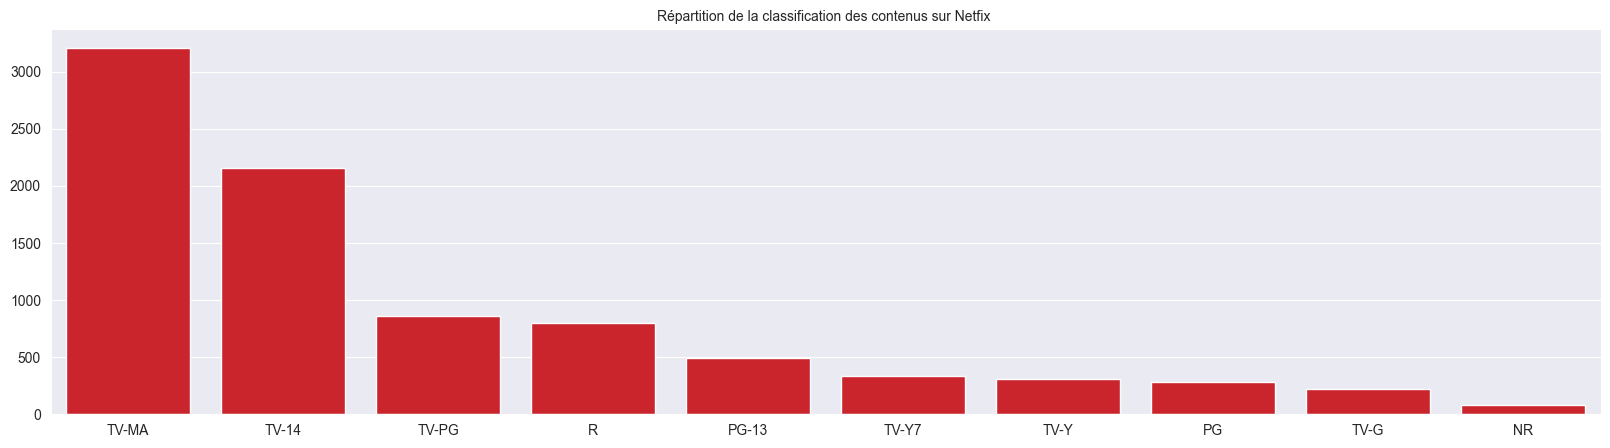

In [38]:
# visualisation de la classification des contenus
plt.figure(figsize=(20,5))
sns.barplot(x = Count_rating.head(10).index , y = Count_rating.head(10).values, color = "#E50914")
plt.title("Répartition de la classification des contenus sur Netfix ", fontsize = 10)
plt.show()

## 4.4 La répartition des pays les plus présent sur Netflix

In [39]:
# Compter combien de fois chaque pays apparaît dans la colonne
Count_country = data_netflix["country"].value_counts()
Count_country.head(10)

United States     3646
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

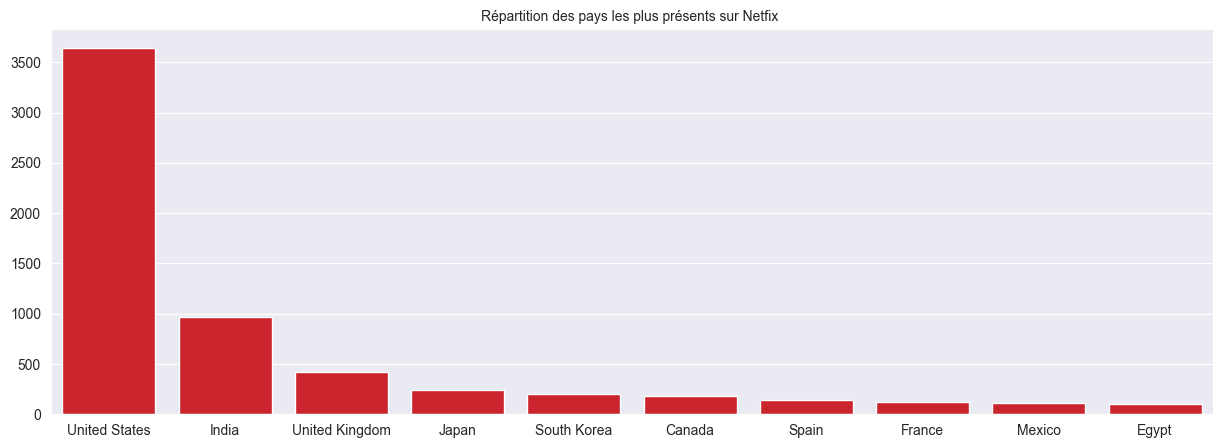

In [40]:
# visualisation des pays
plt.figure(figsize=(15,5))
sns.barplot(x = Count_country.head(10).index , y = Count_country.head(10).values, color = "#E50914")
plt.title("Répartition des pays les plus présents sur Netfix ", fontsize = 10)
plt.show()

## 4.5 La répartition du nombre de contenus par années sur netflix

In [41]:
# Compter combien de fois chaque année apparaît dans la colonne
Count_year = data_netflix["year_added"].value_counts()
Count_year

2019    2016
2020    1889
2018    1649
2021    1498
2017    1187
2016     427
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

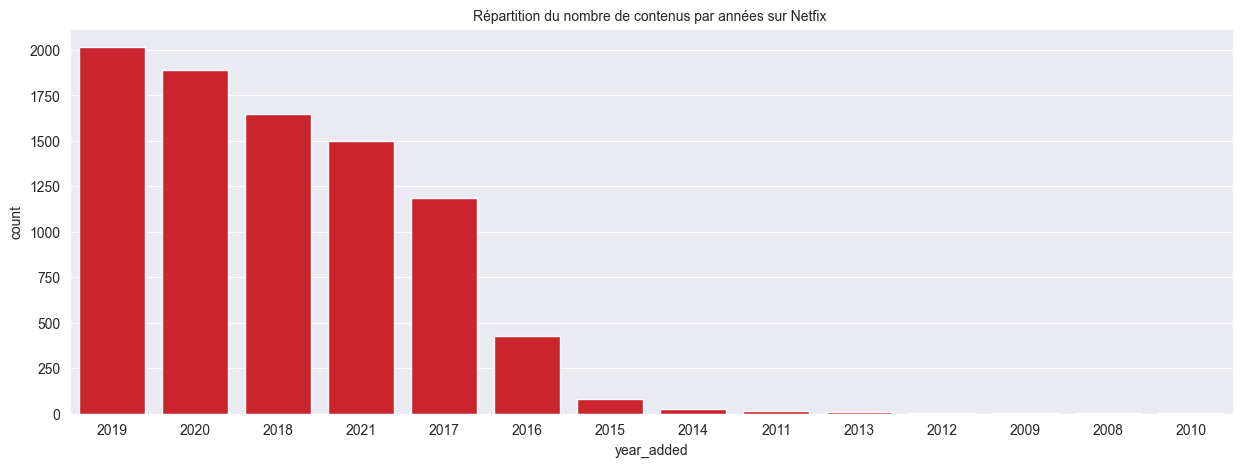

In [42]:
# visualisation des années
plt.figure(figsize=(15,5))
sns.countplot(x = data_netflix["year_added"] , order = data_netflix["year_added"].value_counts(ascending=False).index,
              color = "#E50914")
plt.title("Répartition du nombre de contenus par années sur Netfix ", fontsize = 10)
plt.show()

## 4.6 La répartition du nombre de contenus par mois

In [43]:
# Compter combien de fois chaque mois apparaît dans la colonne
Count_month = data_netflix["month_added"].value_counts()
Count_month

July         827
December     813
September    769
April        763
October      760
August       754
January      748
March        742
June         728
November     705
May          632
February     563
Name: month_added, dtype: int64

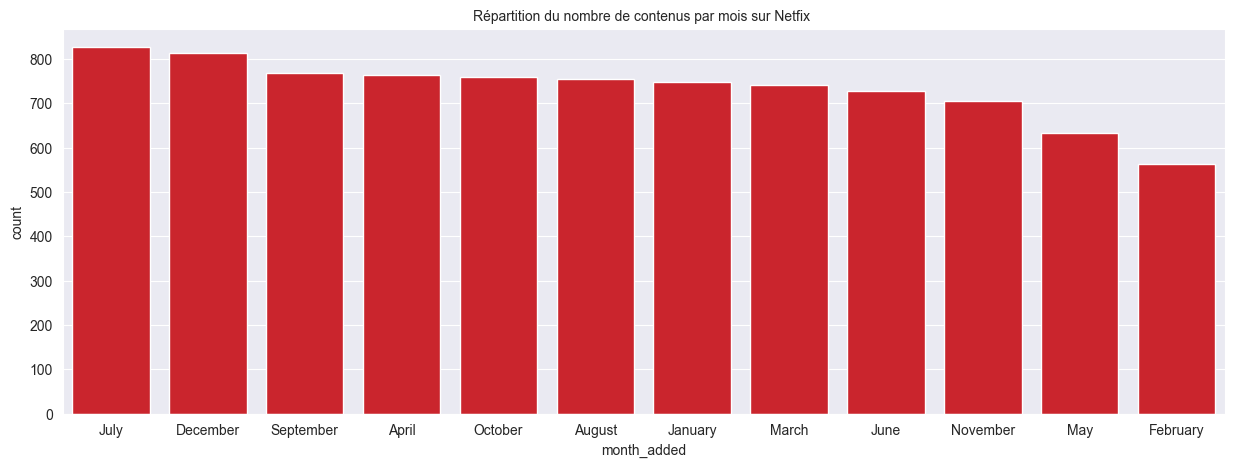

In [44]:
# visualisation des mois
plt.figure(figsize=(15,5))
sns.countplot(x = data_netflix["month_added"] , order = data_netflix["month_added"].value_counts(ascending=False).index,
              color = "#E50914")
plt.title("Répartition du nombre de contenus par mois sur Netfix ", fontsize = 10)
plt.show()

## 4.7 La répartition du nombre de contenus par jour du mois

In [45]:
# Compter combien de fois chaque jour du mois apparaît dans la colonne
Count_day = data_netflix["day_added"].value_counts()
Count_day

1     2222
15     686
2      325
16     288
31     274
20     249
19     243
5      231
22     230
10     214
30     210
6      210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
13     175
4      174
24     159
3      151
11     149
9      147
29     141
Name: day_added, dtype: int64

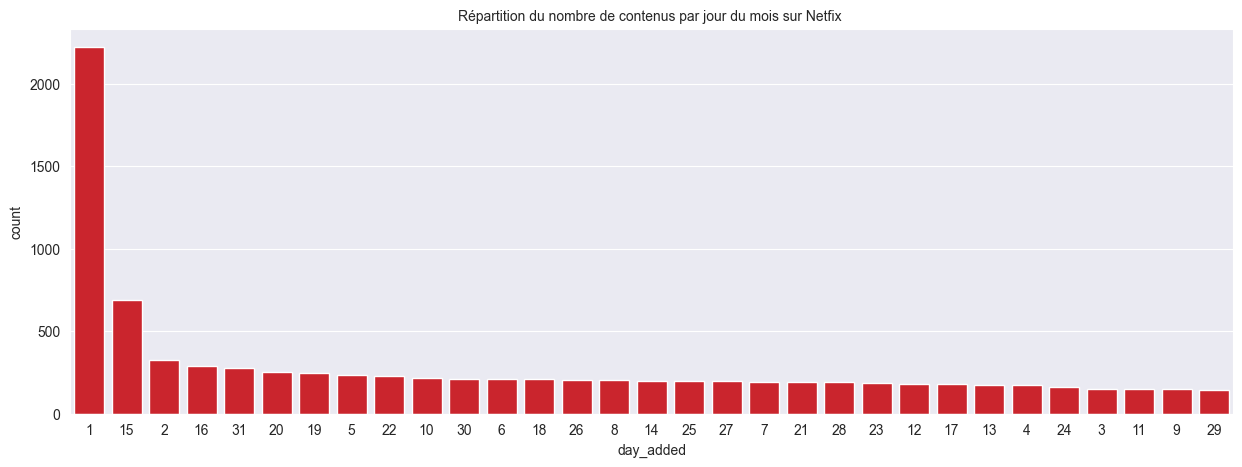

In [46]:
# visualisation des mois
plt.figure(figsize=(15,5))
sns.countplot(x = data_netflix["day_added"] , order = data_netflix["day_added"].value_counts(ascending=False).index,
              color = "#E50914")
plt.title("Répartition du nombre de contenus par jour du mois sur Netfix ", fontsize = 10)
plt.show()

# 5. Séparation des deux DataFrames

* Nous allons maintenant faire la séparation des deux dataframe en fonction du type de contenus pour voir les relations qui existent et pouvoir continuer nos analyses.

In [47]:
# Compter combien de fois la durée chaque films ou emission apparaît dans la colonne
data_netflix["duration"].value_counts().head(5)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64

In [48]:
# Séparation des deux dataframe
# Dataframme avec TV Show seulement
data_tv_shows = data_netflix[data_netflix["type"] == "TV Show"]
print(data_tv_shows.shape)
data_tv_shows.head(3)

(2676, 14)


,show_id,type,title,director,country,release_year,rating,duration,description,year_added,month_added,day_added,genre,lead_actor
1,s2,TV Show,Blood & Water,Rajiv Chilaka,South Africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September,24,International TV Shows,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,September,24,Crime TV Shows,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,United States,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",2021,September,24,Docuseries,David Attenborough


In [49]:
# Compter combien de fois la durée de chaque emission apparaît dans la colonne
data_tv_shows["duration"].value_counts().head(5)

1 Season     1793
2 Seasons     425
3 Seasons     199
4 Seasons      95
5 Seasons      65
Name: duration, dtype: int64

In [50]:
# Dataframme avec Movie seulement
data_movies = data_netflix[data_netflix["type"] == "Movie"]
print(data_movies.shape)
data_movies.head(3)

(6128, 14)


,show_id,type,title,director,country,release_year,rating,duration,description,year_added,month_added,day_added,genre,lead_actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,September,25,Documentaries,David Attenborough
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,2021,September,24,Children & Family Movies,Vanessa Hudgens
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",2021,September,24,Dramas,Kofi Ghanaba


In [51]:
# Compter combien de fois la durée de chaque films dans la colonne
data_movies["duration"].value_counts().head(5)

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

## 5.1 La répartion des acteurs sur les contenus de Netflix

### 5.1.1 Dans les films

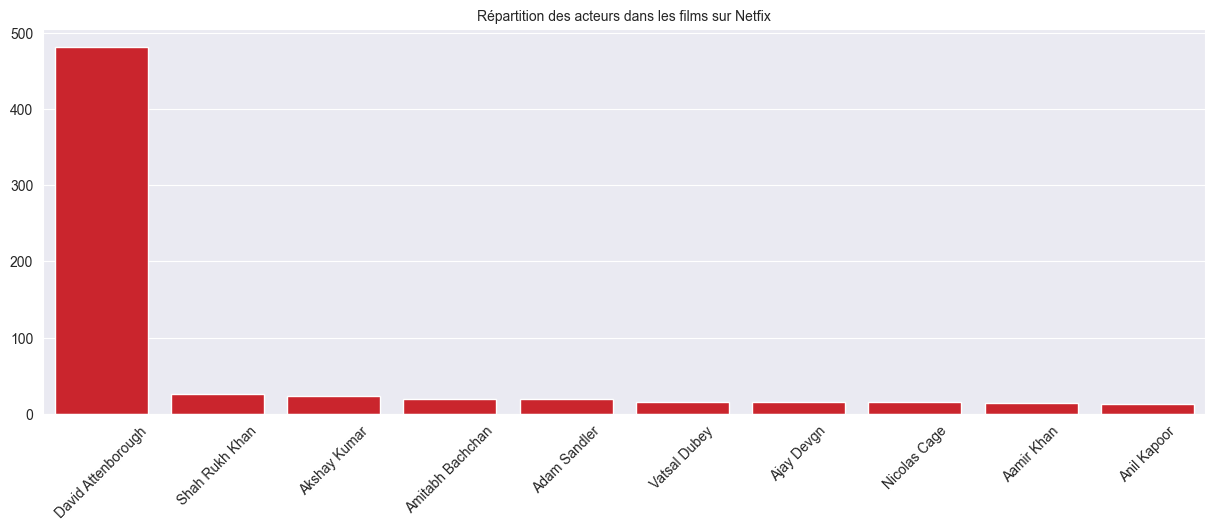

In [52]:
# Compter combien de fois chaque acteur principal apparaît dans la colonne
count_leadactor_movies = data_movies["lead_actor"].value_counts().head(10)
# visualisation du type
plt.figure(figsize=(15,5))
sns.barplot(x = count_leadactor_movies.index, y = count_leadactor_movies.values, color = "#E50914")
plt.title("Répartition des acteurs dans les films sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()

### 5.1.2 Dans les émissions télévisées

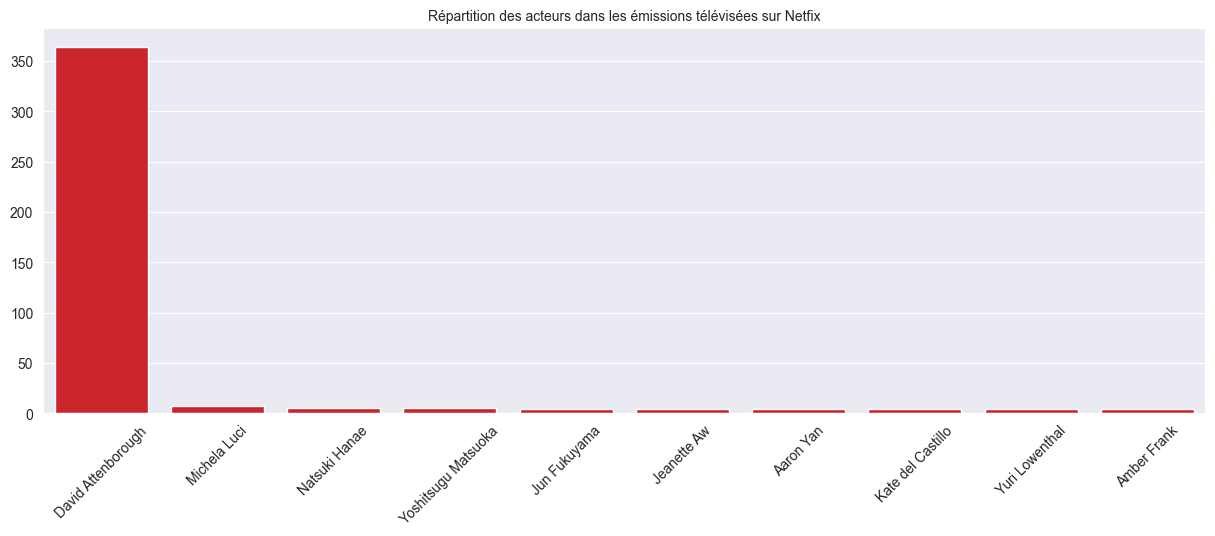

In [53]:
# Compter combien de fois chaque acteur principal apparaît dans la colonne
count_leadactor_Show = data_tv_shows["lead_actor"].value_counts().head(10)
# visualisation du type
plt.figure(figsize=(15,5))
sns.barplot(x = count_leadactor_Show.index, y = count_leadactor_Show.values, color = "#E50914")
plt.title("Répartition des acteurs dans les émissions télévisées sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()

## 5.2 La répartion des directeurs de casting sur les contenus de Netflix

### 5.2.1 Dans les films

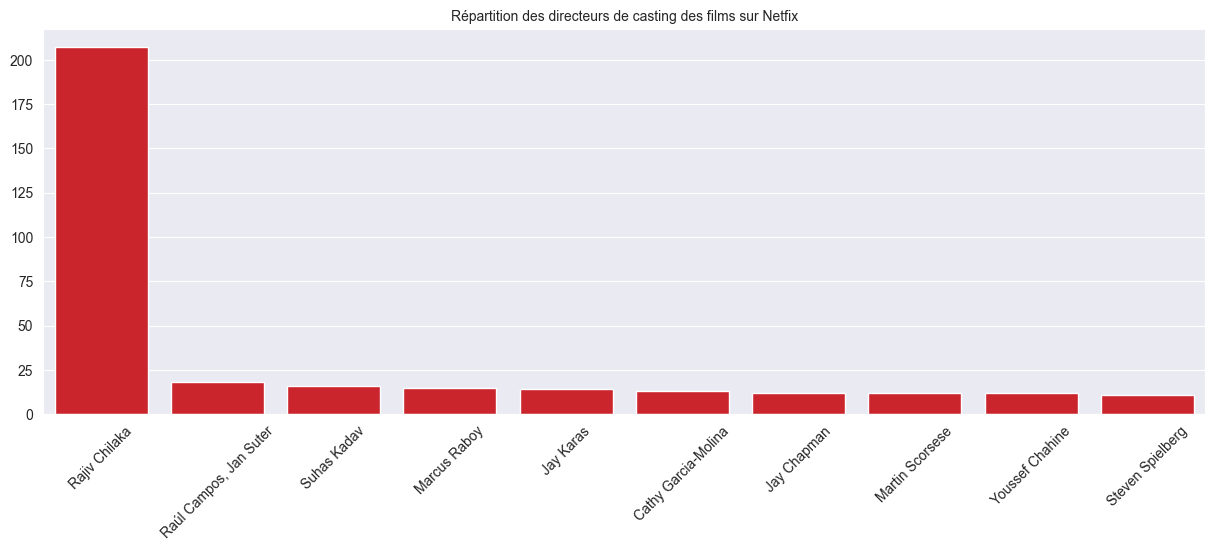

In [54]:
# Compter combien de fois chaque acteur principal apparaît dans la colonne
count_leadactor_movies = data_movies["director"].value_counts().head(10)
# visualisation du type
plt.figure(figsize=(15,5))
sns.barplot(x = count_leadactor_movies.index, y = count_leadactor_movies.values, color = "#E50914")
plt.title("Répartition des directeurs de casting des films sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()

### 5.2.2 Dans les émissions télévisées

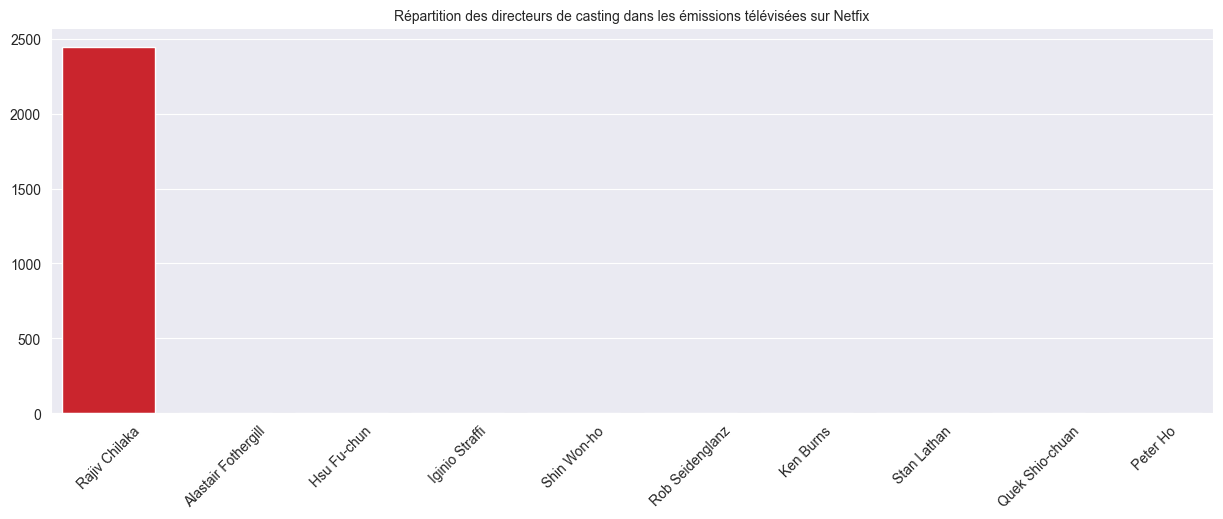

In [55]:
# Compter combien de fois chaque acteur principal apparaît dans la colonne
count_leadactor_TV = data_tv_shows["director"].value_counts().head(10)
# visualisation du type
plt.figure(figsize=(15,5))
sns.barplot(x = count_leadactor_TV.index, y = count_leadactor_TV.values, color = "#E50914")
plt.title("Répartition des directeurs de casting dans les émissions télévisées sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()

## 5.3 La répartion de la durée des contenus sur Netflix

### 5.3.1 Dans les films

In [56]:
# Prendre le premier élément puis les convertir
data_movies["duration_min"] = data_movies["duration"].str.split(" ").str[0].astype(int)

# La moyenne de la durée des contenus
mean_genre_movies = data_movies.groupby(["genre"])["duration_min"].mean().round().sort_values(ascending=False)
mean_genre_movies.head(10)

genre
Classic Movies          115.0
Action & Adventure      114.0
Dramas                  111.0
International Movies    108.0
Sci-Fi & Fantasy        107.0
Comedies                107.0
Cult Movies             102.0
Thrillers               100.0
LGBTQ Movies             99.0
Independent Movies       99.0
Name: duration_min, dtype: float64

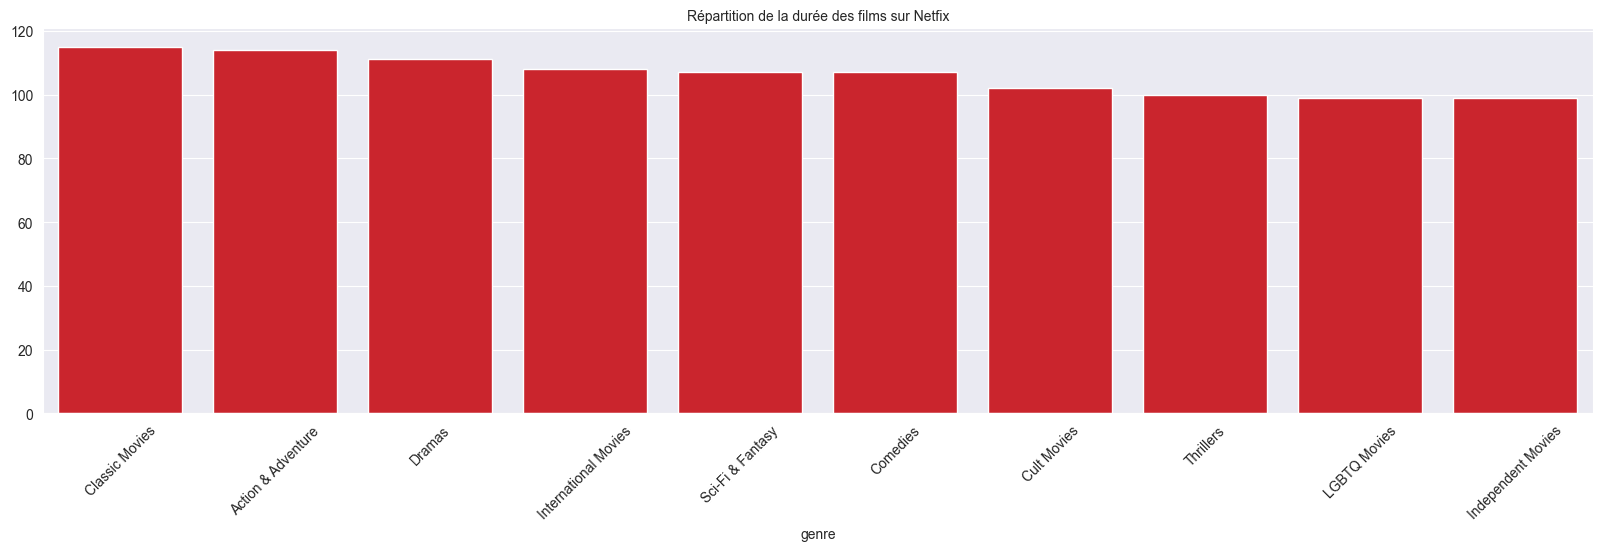

In [57]:
# visualisation du type
plt.figure(figsize=(20,5))
sns.barplot(x = mean_genre_movies.head(10).index, y = mean_genre_movies.head(10).values, color = "#E50914")
plt.title("Répartition de la durée des films sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()

### 5.3.2 Dans les émissions télévisées

In [58]:
# Prendre le premier élément puis les convertir
data_tv_shows["duration_season"] = data_tv_shows["duration"].str.split(" ").str[0].astype(int)

# La moyenne de la durée des émissions télévisées
mean_genre_shows = data_tv_shows.groupby(["genre"])["duration_season"].mean().round().sort_values(ascending=False)
mean_genre_shows.head(10)

genre
Classic & Cult TV               6.0
Romantic TV Shows               3.0
TV Sci-Fi & Fantasy             3.0
TV Horror                       3.0
TV Dramas                       3.0
TV Comedies                     3.0
TV Action & Adventure           3.0
Stand-Up Comedy & Talk Shows    2.0
Anime Series                    2.0
British TV Shows                2.0
Name: duration_season, dtype: float64

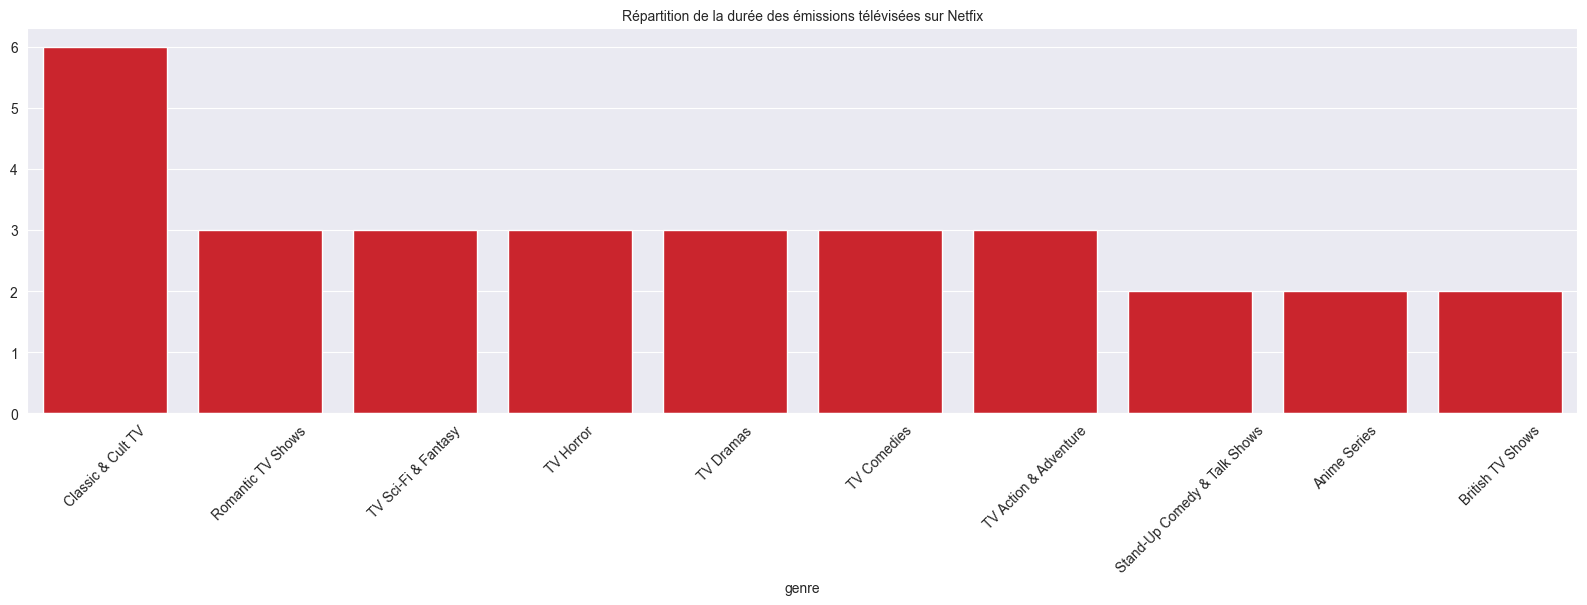

In [59]:
# visualisation du type
plt.figure(figsize=(20,5))
sns.barplot(x = mean_genre_shows.head(10).index, y = mean_genre_shows.head(10).values, color = "#E50914")
plt.title("Répartition de la durée des émissions télévisées sur Netfix", fontsize = 10)
plt.xticks(rotation=45)
plt.show()